## **Mengistall Pandas terlebih dahulu**

In [2]:
pip install pandas openpyxl

## **Menset data dan melakukan preprocessing**

In [11]:
# 1. Impor pustaka yang diperlukan
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd

# 2. Jika kamu menjalankan di Google Colab, unggah file CSV terlebih dahulu
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    print("Bukan di Google Colab. Pastikan file CSV sudah tersedia di direktori lokal.")

# 3. Ganti nama file CSV dengan nama file yang telah diunggah atau tersedia
file_path = 'cirrhosis.csv'

# 4. Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# 5. Konfigurasi tampilan agar semua data bisa terlihat dengan baik
pd.set_option('display.max_rows', None)          # Tampilkan semua baris
pd.set_option('display.max_columns', None)       # Tampilkan semua kolom
pd.set_option('display.width', 0)                # Lebar tampilan otomatis
pd.set_option('display.max_colwidth', None)      # Tampilkan seluruh isi kolom (tidak terpotong)

# 6. Tampilkan seluruh isi DataFrame tanpa index
print(df.to_string(index=False))


Saving cirrhosis.csv to cirrhosis (4).csv
 ID  N_Days Status            Drug   Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  Tryglicerides  Platelets  Prothrombin  Stage
  1     400      D D-penicillamine 21464   F       Y            Y       Y     Y       14.5        261.0     2.60   156.0    1718.0 137.95          172.0      190.0         12.2    4.0
  2    4500      C D-penicillamine 20617   F       N            Y       Y     N        1.1        302.0     4.14    54.0    7394.8 113.52           88.0      221.0         10.6    3.0
  3    1012      D D-penicillamine 25594   M       N            N       N     S        1.4        176.0     3.48   210.0     516.0  96.10           55.0      151.0         12.0    4.0
  4    1925      D D-penicillamine 19994   F       N            Y       Y     S        1.8        244.0     2.54    64.0    6121.8  60.63           92.0      183.0         10.3    4.0
  5    1504     CL         Placebo 139

In [12]:
# 1. Cek info umum dan missing values
print("\nInfo DataFrame:")
print(df.info())

print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# 2. Hapus baris duplikat (jika ada)
df = df.drop_duplicates()

# 3. Tangani missing values
# Contoh: isi dengan median untuk kolom numerik, dan modus untuk kategorikal
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# 4. Konversi tipe data jika perlu (contoh: ubah kolom tanggal jadi datetime)
# df['tanggal'] = pd.to_datetime(df['tanggal'])

# 5. Encoding data kategorikal (jika ada)
# Contoh: one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# 6. Normalisasi atau standarisasi (jika diperlukan untuk model ML)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)
# df = pd.DataFrame(df_scaled, columns=df.columns)

# 7. Tampilkan hasil akhir dari DataFrame yang sudah dibersihkan
print("\nData setelah preprocessing:")
print(df.head())


Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float6

## **Memfilter Data menggunakan metode LOF mencegah adanya data outlier**

In [15]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd

# Ambil kolom numerik saja
df_numerik = df.select_dtypes(include=[np.number])

# Pastikan tidak ada missing values
df_numerik = df_numerik.dropna()

# Inisialisasi model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% data diasumsikan outlier

# Fit dan prediksi
y_pred = lof.fit_predict(df_numerik)

# -1 = outlier, 1 = normal
df['LOF_Outlier'] = y_pred

# Filter hanya outlier
outliers = df[df['LOF_Outlier'] == -1]

print("\nData yang terdeteksi sebagai outlier oleh LOF:")
print(outliers)



Data yang terdeteksi sebagai outlier oleh LOF:
      ID  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
14    15    3584  23612        0.8        231.0     3.87   173.0    9009.8   
22    23     264  20442       17.4        395.0     2.94   558.0    6064.8   
23    24    4079  16261        2.1        456.0     4.00   124.0    5719.0   
28    29    4509  23331        0.7        370.0     3.78    24.0    5833.0   
29    30     321  15116        3.6        260.0     2.54   172.0    7277.0   
36    37     223  22546        7.1        334.0     3.01   150.0    6931.2   
41    42    4453  12307        2.1        309.5     3.54   122.0    8778.0   
42    43    4556  17850        1.1        361.0     3.64    36.0    5430.2   
50    51    3853  19025        0.8        276.0     3.60    54.0    4332.0   
52    53    1000  24621        2.6        309.5     3.10    94.0    6456.2   
53    54    1434  14317        1.3        288.0     3.40   262.0    5487.2   
54    55    1360

## **Data yang sudah bersih dan data yang terindikasi outlier**

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Salin DataFrame awal
df_processed = df.copy()

# 1. Hapus duplikat
df_processed = df_processed.drop_duplicates()

# 2. Isi missing values
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])
    else:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())

# 3. Ambil hanya kolom numerik untuk analisis LOF
df_numerik = df_processed.select_dtypes(include=[np.number])
df_numerik = df_numerik.dropna()  # pastikan tidak ada missing values

# 4. Terapkan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(df_numerik)

# 5. Tambahkan hasil LOF ke DataFrame utama
df_processed['LOF_Outlier'] = y_pred

# 6. Pisahkan data bersih dan outlier
df_bersih = df_processed[df_processed['LOF_Outlier'] == 1].drop(columns=['LOF_Outlier'])
df_outlier = df_processed[df_processed['LOF_Outlier'] == -1].drop(columns=['LOF_Outlier'])

# 7. Tampilkan hasil
print("\n📊 Data Bersih (tanpa outlier):")
print(df_bersih.to_string(index=False))

print("\n⚠️ Data yang Terindikasi Sebagai Outlier:")
print(df_outlier.to_string(index=False))



📊 Data Bersih (tanpa outlier):
 ID  N_Days   Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Status_CL  Status_D  Drug_Placebo  Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  Edema_Y
  1     400 21464       14.5        261.0     2.60   156.0    1718.0 137.95          172.0      190.0         12.2    4.0      False      True         False  False       True            True       True    False     True
  2    4500 20617        1.1        302.0     4.14    54.0    7394.8 113.52           88.0      221.0         10.6    3.0      False     False         False  False      False            True       True    False    False
  3    1012 25594        1.4        176.0     3.48   210.0     516.0  96.10           55.0      151.0         12.0    4.0      False      True         False   True      False           False      False     True    False
  4    1925 19994        1.8        244.0     2.54    64.0    6121.8  60.63           92

In [17]:
# Salin data asli untuk diproses
df_copy = df.copy()

# Bersihkan data dulu: hapus duplikat, isi missing value
df_copy = df_copy.drop_duplicates()

for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
    else:
        df_copy[col] = df_copy[col].fillna(df_copy[col].median())

# Ambil kolom numerik
df_numerik = df_copy.select_dtypes(include=[np.number])

# Pastikan tidak ada missing values dalam numerik
df_numerik = df_numerik.dropna()

# Deteksi outlier dengan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(df_numerik)

# Tambahkan hasil prediksi ke DataFrame
df_copy['LOF_Outlier'] = y_pred

# Hitung jumlah data outlier dan data bersih
jumlah_outlier = (y_pred == -1).sum()
jumlah_bersih = (y_pred == 1).sum()

print(f"Jumlah data bersih   : {jumlah_bersih}")
print(f"Jumlah data outlier : {jumlah_outlier}")

Jumlah data bersih   : 397
Jumlah data outlier : 21


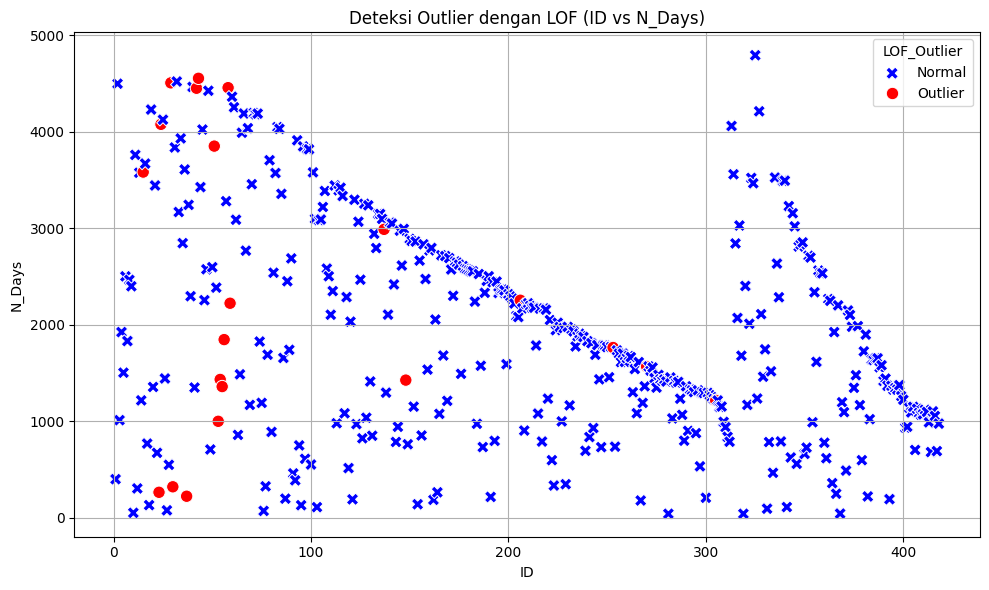

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kita punya setidaknya 2 kolom numerik untuk scatter plot
if df_numerik.shape[1] >= 2:
    x_col = df_numerik.columns[0]
    y_col = df_numerik.columns[1]

    # Tambahkan hasil prediksi LOF ke df_numerik hanya untuk plotting
    df_plot = df_numerik.copy()
    df_plot['LOF_Outlier'] = y_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_plot, x=x_col, y=y_col, hue='LOF_Outlier', palette={1: 'blue', -1: 'red'}, style='LOF_Outlier', s=80)
    plt.title(f'Deteksi Outlier dengan LOF ({x_col} vs {y_col})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='LOF_Outlier', labels=['Normal', 'Outlier'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗ Butuh minimal 2 kolom numerik untuk membuat scatter plot.")
